# 영문 분석 + 워드클라우드

In [2]:
!pip install matplotlib
!pip install wordCloud

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [5]:
!pip install xlrd

In [6]:
df = pd.read_csv('영어단어분석/review.csv', encoding='latin1')

In [7]:
print(df.head())

   id  rating                                              title  \
0   1      10        When you run into your ex and his jaw drops   
1   2       8                                 Classic and classy   
2   3      10                          Absolutely gorgeous dress   
3   4      10  This was a last-minute decision and my first e...   
4   5      10    Very forgiving shape and beautiful lace design.   

                                             content  month  year  yearmonth  
0  Flattering, standout style that's perfectly fe...      9  2017     201709  
1  A classy dress. Not a show stopper, but defini...      9  2017     201709  
2  My first time using RTR and I was so impressed...      8  2017     201708  
3  Dress was in beautiful shape, material was stu...      8  2017     201708  
4                 Very shapely. Elegant lace design.      8  2017     201708  


# 1. title 단어 분석

In [8]:
all_files_data_concat = pd.concat([df])

In [9]:
all_title=all_files_data_concat['title']
all_title

0            When you run into your ex and his jaw drops
1                                     Classic and classy
2                              Absolutely gorgeous dress
3      This was a last-minute decision and my first e...
4        Very forgiving shape and beautiful lace design.
                             ...                        
568                         Beautiful shape, lovely lace
569                                Classic and beautiful
570                                     Beautiful dress!
571               AMAZING BACK! Lace detail was gorgeous
572              Beautiful open back and both brand new!
Name: title, Length: 573, dtype: object

## 데이터 전처리
- 영어가 아닌 단어 제거
- 소문자로 정규화하여 단어 토큰화
- 불용어 제거 및 표제어 추출

In [13]:
stopWords=set(stopwords.words('english')) #영어 불용어 로드
lemma=WordNetLemmatizer() #표제어 추출 작업을 제공하는 객체

In [14]:
words=[]

for title in all_title:
    #알파벳이 아닌 문자를 공백으로 치환
    EnWords=re.sub(r"[^a-zA-Z]+", " ", str(title))
    
    #소문자로 정규화
    EnWordsToken=word_tokenize(EnWords.lower())
    
    #불용어 제거 및 표제어 추출
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [15]:
#words가 2차원 리스트이기 때문에 reduce() 함수를 이용하여 1차원 리스트로 변환함
words2=list(reduce(lambda x, y:x+y, words))
print(words2)

['run', 'ex', 'jaw', 'drop', 'classic', 'classy', 'absolutely', 'gorgeous', 'dress', 'last', 'minute', 'decision', 'first', 'experience', 'rtr', 'pleasantly', 'surprised', 'forgiving', 'shape', 'beautiful', 'lace', 'design', 'beautiful', 'dress', 'perfect', 'dress', 'something', 'blue', 'perfect', 'dress', 'wedding', 'wore', 'wedding', 'shortly', 'baby', 'thick', 'material', 'perfect', 'loved', 'lace', 'stunning', 'classy', 'replacement', 'bridesmaid', 'dress', 'classy', 'sexy', 'beautiful', 'blue', 'birthday', 'dress', 'run', 'smaller', 'ml', 'dress', 'rtr', 'loved', 'dress', 'great', 'fit', 'looked', 'great', 'would', 'love', 'buy', 'evening', 'wedding', 'hollywood', 'rtr', 'easy', 'reliable', 'usual', 'dress', 'made', 'feel', 'good', 'fit', 'perfectly', 'pretty', 'blue', 'good', 'length', 'lace', 'worn', 'loose', 'dress', 'looked', 'beautiful', 'comfortable', 'amazing', 'dress', 'disappoint', 'everyone', 'love', 'dress', 'niece', 'birthday', 'beautiful', 'wear', 'bra', 'awesome', 'd

## 데이터 탐색 및 분석 모델 구축

In [16]:
count=Counter(words2)
count

Counter({'run': 12,
         'ex': 1,
         'jaw': 1,
         'drop': 1,
         'classic': 13,
         'classy': 50,
         'absolutely': 12,
         'gorgeous': 38,
         'dress': 317,
         'last': 2,
         'minute': 1,
         'decision': 1,
         'first': 7,
         'experience': 10,
         'rtr': 19,
         'pleasantly': 1,
         'surprised': 1,
         'forgiving': 1,
         'shape': 8,
         'beautiful': 115,
         'lace': 30,
         'design': 1,
         'perfect': 76,
         'something': 1,
         'blue': 4,
         'wedding': 86,
         'wore': 13,
         'shortly': 1,
         'baby': 1,
         'thick': 2,
         'material': 2,
         'loved': 39,
         'stunning': 14,
         'replacement': 2,
         'bridesmaid': 6,
         'sexy': 15,
         'birthday': 2,
         'smaller': 1,
         'ml': 1,
         'great': 73,
         'fit': 54,
         'looked': 12,
         'would': 7,
         'love': 31,
     

In [17]:
word_count=dict()
word_count
for tag, counts in count.most_common(50):
    if len(str(tag))>1:
        word_count[tag]=counts
        print("%s : %d" %(tag, counts))

#의미없는 단어도 있어서 길이가 1보다 큰 단어를 선별함

dress : 317
beautiful : 115
wedding : 86
compliment : 85
perfect : 76
great : 73
fit : 54
classy : 50
many : 42
loved : 39
gorgeous : 38
comfortable : 35
received : 33
back : 32
love : 31
got : 31
lace : 30
elegant : 24
night : 21
felt : 21
amazing : 20
rtr : 19
wear : 19
flattering : 18
sexy : 15
pretty : 15
lot : 15
stunning : 14
formal : 14
time : 14
classic : 13
wore : 13
like : 13
run : 12
absolutely : 12
looked : 12
nice : 12
ton : 12
event : 11
experience : 10
easy : 10
made : 10
detail : 10
color : 10
fun : 9
rent : 9
shape : 8
evening : 8
feel : 8
work : 8


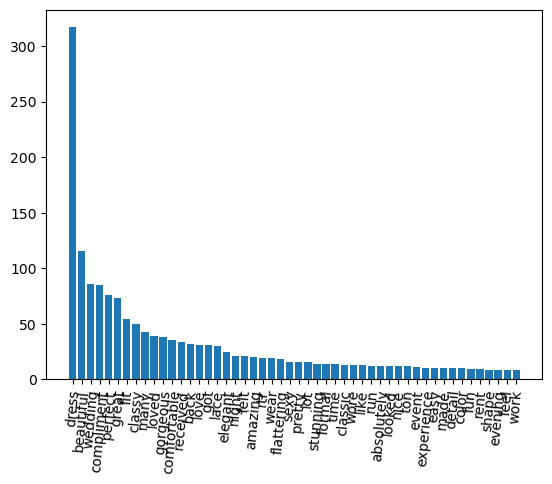

In [18]:
sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

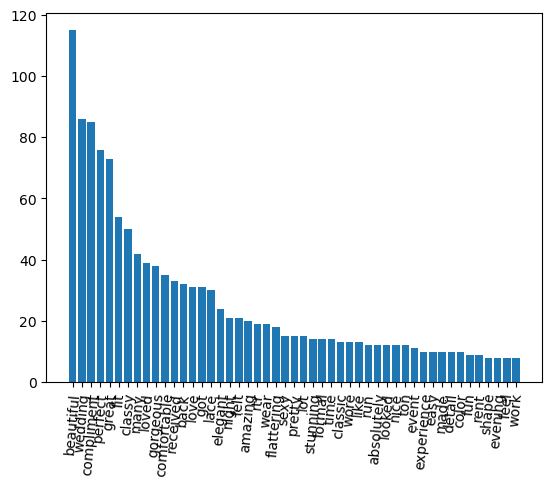

In [19]:
del word_count['dress']

sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [20]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('year', as_index=False)['doc_count'].count()

summary_year

,year,doc_count
0,2013,2
1,2014,165
2,2015,176
3,2016,164
4,2017,66


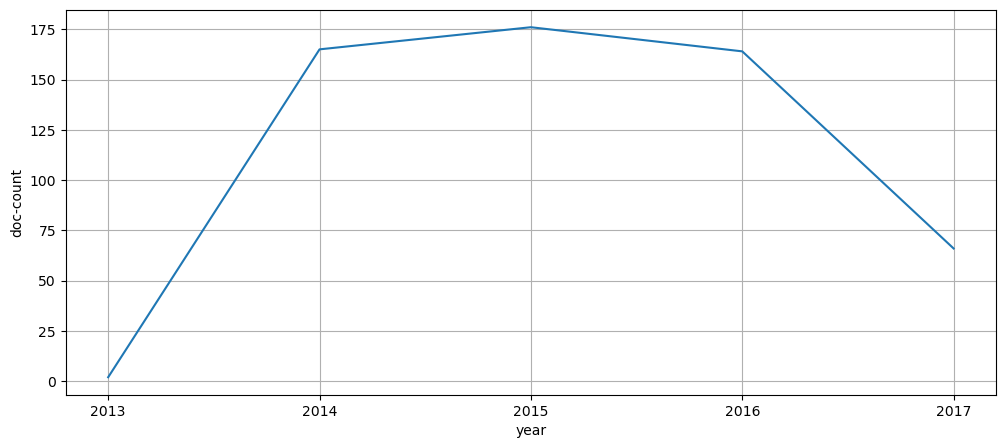

In [21]:
plt.figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['year']])
plt.show()

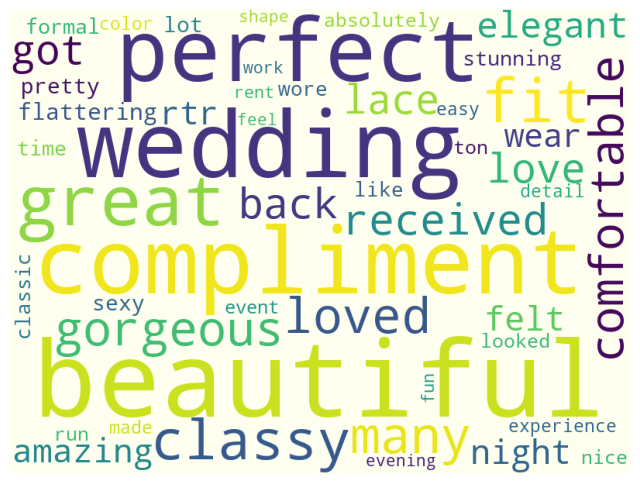

In [22]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords,
            width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [23]:
cloud.to_file('영어단어분석/clothingTitlewordCloud.jpg')

# 2. content 단어 분석

In [24]:
all_content=all_files_data_concat['content']
all_content

0      Flattering, standout style that's perfectly fe...
1      A classy dress. Not a show stopper, but defini...
2      My first time using RTR and I was so impressed...
3      Dress was in beautiful shape, material was stu...
4                     Very shapely. Elegant lace design.
                             ...                        
568    Great dress-wore this for a company holiday pa...
569    Everyone I saw that night loved this dress.  I...
570    Love this dress- wish  I owned it. You can't w...
571    At first I wasn't in love with this dress, but...
572    I loved wearing this dress for a fancy office ...
Name: content, Length: 573, dtype: object

## 데이터 전처리
- 영어가 아닌 단어 제거
- 소문자로 정규화하여 단어 토큰화
- 불용어 제거 및 표제어 추출

In [28]:
words_content=[]

for content in all_content:
    #알파벳이 아닌 문자를 공백으로 치환
    EnWords=re.sub(r"[^a-zA-Z]+", " ", str(content))
    
    #소문자로 정규화
    EnWordsToken=word_tokenize(EnWords.lower())
    
    #불용어 제거 및 표제어 추출
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words_content.append(EnWordsTokenStopLemma)


In [29]:
#words_content가 2차원 리스트이기 때문에 reduce() 함수를 이용하여 1차원 리스트로 변환함
words3=list(reduce(lambda x, y:x+y, words_content))
print(words3)

['flattering', 'standout', 'style', 'perfectly', 'feminine', 'classy', 'dress', 'show', 'stopper', 'definitely', 'solid', 'option', 'almost', 'wedding', 'love', 'cap', 'sleeve', 'lace', 'neckline', 'first', 'time', 'using', 'rtr', 'impressed', 'normally', 'wear', 'size', 'ordered', 'size', 'well', 'based', 'review', 'size', 'fit', 'perfect', 'already', 'rented', 'another', 'outfit', 'next', 'event', 'weekend', 'love', 'love', 'love', 'dress', 'beautiful', 'shape', 'material', 'sturdy', 'coloring', 'make', 'hard', 'see', 'detail', 'photo', 'beautiful', 'lace', 'dress', 'normally', 'depending', 'name', 'brand', 'happy', 'know', 'could', 'get', 'free', 'backup', 'size', 'ended', 'fitting', 'perfectly', 'elegant', 'dress', 'got', 'lot', 'compliment', 'definitely', 'renting', 'shapely', 'elegant', 'lace', 'design', 'dress', 'stunning', 'lot', 'compliment', 'size', 'fit', 'perfectly', 'would', 'rent', 'wore', 'dress', 'small', 'elopement', 'ceremony', 'dress', 'perfect', 'fit', 'well', 'need

## 데이터 탐색 및 분석 모델 구축

In [30]:
count=Counter(words3)
count

Counter({'flattering': 52,
         'standout': 1,
         'style': 16,
         'perfectly': 53,
         'feminine': 4,
         'classy': 51,
         'dress': 948,
         'show': 19,
         'stopper': 1,
         'definitely': 92,
         'solid': 3,
         'option': 5,
         'almost': 14,
         'wedding': 127,
         'love': 38,
         'cap': 5,
         'sleeve': 14,
         'lace': 190,
         'neckline': 25,
         'first': 45,
         'time': 36,
         'using': 3,
         'rtr': 87,
         'impressed': 1,
         'normally': 20,
         'wear': 219,
         'size': 280,
         'ordered': 65,
         'well': 87,
         'based': 3,
         'review': 24,
         'fit': 354,
         'perfect': 132,
         'already': 7,
         'rented': 42,
         'another': 29,
         'outfit': 3,
         'next': 17,
         'event': 42,
         'weekend': 6,
         'beautiful': 165,
         'shape': 23,
         'material': 26,
         'stur

In [31]:
word_count=dict()
word_count
for tag, counts in count.most_common(50):
    if len(str(tag))>1:
        word_count[tag]=counts
        print("%s : %d" %(tag, counts))

#의미없는 단어도 있어서 길이가 1보다 큰 단어를 선별함

dress : 948
fit : 354
back : 286
size : 280
bra : 255
wear : 219
would : 209
lace : 190
beautiful : 165
little : 156
compliment : 153
great : 150
perfect : 132
wedding : 127
comfortable : 125
loved : 118
wore : 117
top : 116
night : 98
bit : 96
got : 93
definitely : 92
rtr : 87
well : 87
received : 84
like : 79
one : 76
felt : 75
tight : 74
many : 73
rent : 71
big : 70
recommend : 70
bust : 69
open : 68
hip : 68
color : 67
really : 66
ordered : 65
could : 61
around : 61
look : 60
gorgeous : 60
true : 59
loose : 59
wearing : 58
overall : 57
length : 56
much : 56
navy : 55


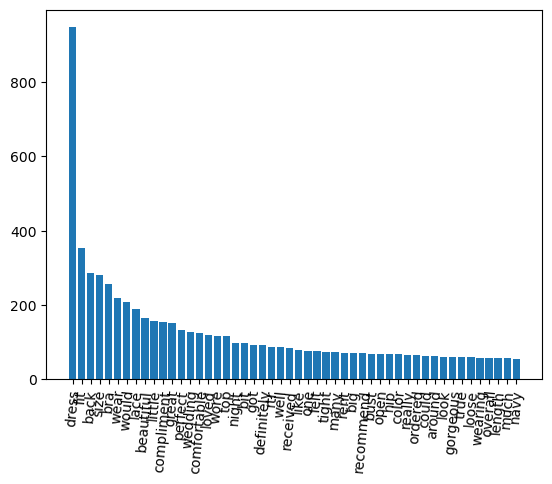

In [32]:
sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

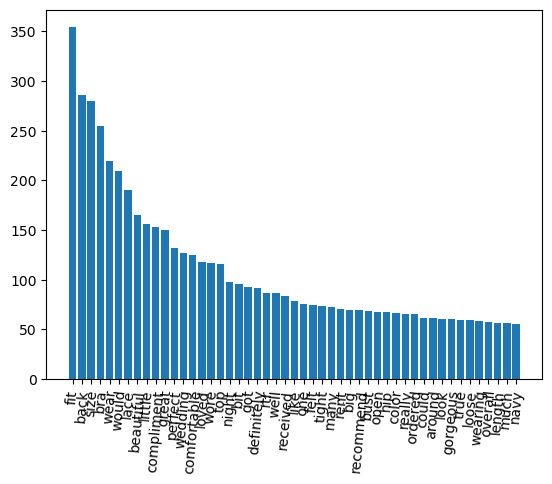

In [33]:
del word_count['dress']

sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [34]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('year', as_index=False)['doc_count'].count()

summary_year

,year,doc_count
0,2013,2
1,2014,165
2,2015,176
3,2016,164
4,2017,66


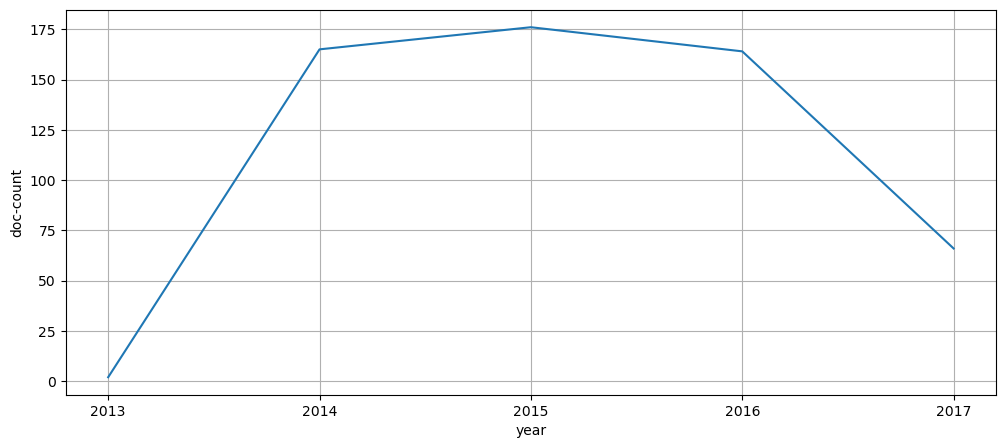

In [35]:
plt.figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['year']])
plt.show()

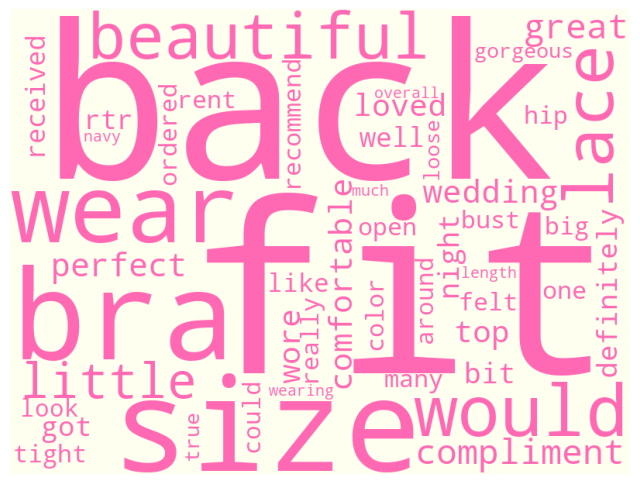

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 사용자 정의 색상 함수
def pink_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(255,105,180)"  # 분홍색 RGB 코드

stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords,
            width=800, height=600,
            color_func=pink_color_func  # 사용자 정의 색상 함수 지정
           ).generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [46]:
cloud.to_file('영어단어분석/clothingContentwordCloud.jpg')

title은 인상 중심, content는 경험 중심

interesting한 분석 결과 - 평점, 시계열(seasonality), title content 공통 단어 분석